In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [62]:
df= pd.read_csv('gre.csv', encoding= 'latin')

In [63]:
df.columns

Index(['Serial No.', 'Student Name', 'GRE Score', 'TOEFL Score',
       'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admitted'],
      dtype='object')

In [64]:
df= df.drop(['Student Name', 'Serial No.'], axis=1)

In [65]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,Y
1,324,107,4,4.0,4.5,8.87,1,N
2,316,104,3,3.0,3.5,8.00,1,N
3,322,110,3,3.5,2.5,8.67,1,N
4,314,103,2,2.0,3.0,8.21,0,N


In [66]:
label_encoder= LabelEncoder()

In [67]:
df['Admitted']= label_encoder.fit_transform(df['Admitted']) 

In [68]:
print(df['Admitted'].unique())
df.head()

[1 0]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [59]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Admitted             500 non-null int32
dtypes: float64(3), int32(1), int64(4)
memory usage: 29.4 KB


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admitted             0
dtype: int64

### Basic insights from given data

In [69]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.140000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.347335
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


#### Correlation Heatmap to identify linear relationships

In [77]:
cor= df.corr()['Admitted']
print(cor)

GRE Score            0.575152
TOEFL Score          0.598192
University Rating    0.514750
SOP                  0.476360
LOR                  0.427809
CGPA                 0.615297
Research             0.357641
Admitted             1.000000
Name: Admitted, dtype: float64


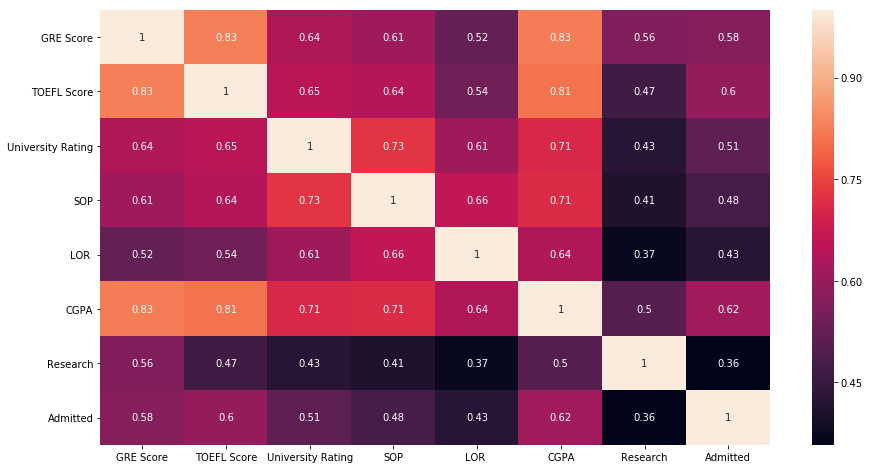

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

High Correlation features for 'Admitted':
* CGPA (most important)
* TOEFL
* GRE

#### How much does Research experience matter?: 

In [73]:
print("Total number of students with Research experience : ",(df['Research']==1).sum())
print("Total number of students without Research experience : ",len(df)-(df['Research']==1).sum())
print("Percentage of students with Research : ",round(((df['Research']==1).sum()/len(df))*100,2),'%')

Total number of students with Research experience :  280
Total number of students without Research experience :  220
Percentage of students with Research :  56.0 %


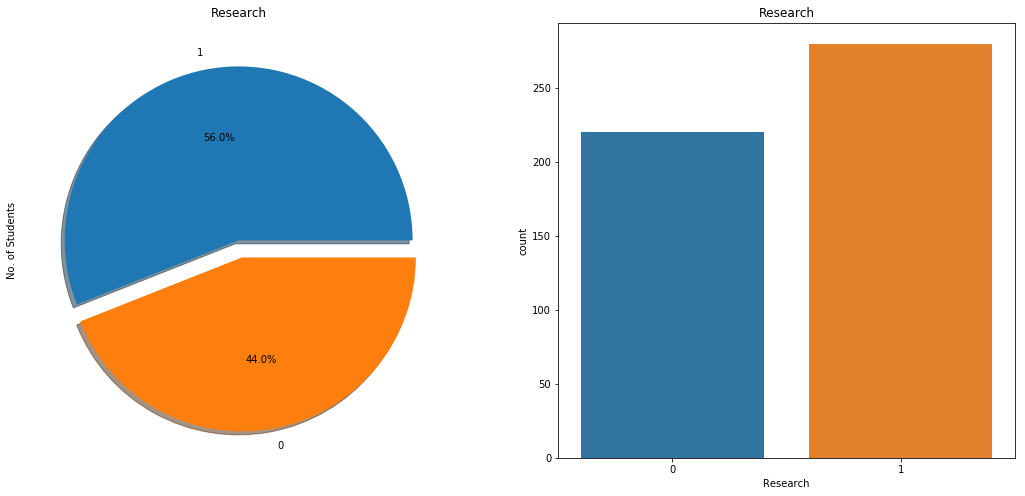

In [82]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Research')
ax[0].set_ylabel('No. of Students')
sns.countplot('Research',data=df,ax=ax[1])
ax[1].set_title('Research')
plt.show()

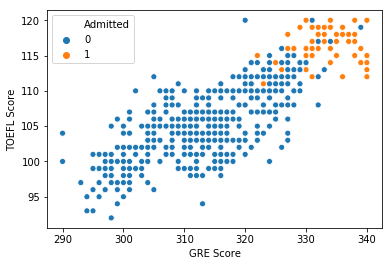

In [87]:
sns.scatterplot(data=df ,x= 'GRE Score',y='TOEFL Score',hue='Admitted')

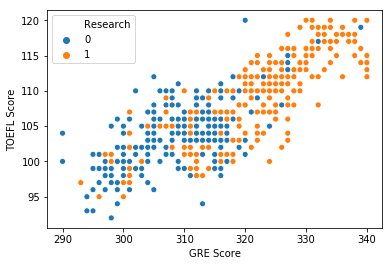

In [88]:
sns.scatterplot(data=df ,x= 'GRE Score',y='TOEFL Score',hue='Research')

### University Ranking

In [90]:
print('From given University Rating each university has a Student count of:')
print('University Rating 1 : ',(df['University Rating']==1).sum())
print('University Rating 2 : ',(df['University Rating']==2).sum())
print('University Rating 3 : ',(df['University Rating']==3).sum())
print('University Rating 4 : ',(df['University Rating']==4).sum())
print('University Rating 5 : ',(df['University Rating']==5).sum())

From given University Rating each university has a Student count of:
University Rating 1 :  34
University Rating 2 :  126
University Rating 3 :  162
University Rating 4 :  105
University Rating 5 :  73


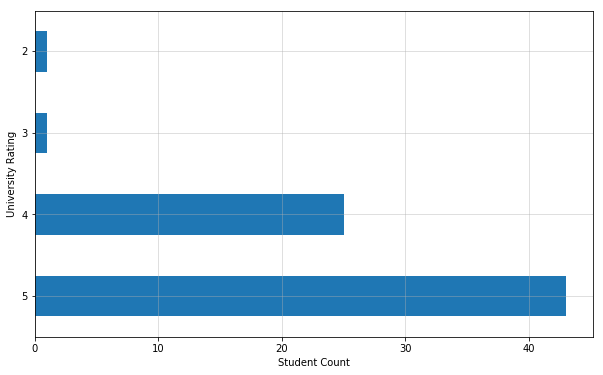

In [91]:
plt.figure(figsize=(10,6))
uni_rating = df[df["Admitted"] == 1]["University Rating"].value_counts()
uni_rating.plot(kind='barh')
plt.grid(alpha=0.5)
plt.xlabel('Student Count')
plt.ylabel('University Rating')
plt.show()

Nobody who came from a university with a ranking of 1 got into a Masters program

## Model

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(x,y,
                                              test_size=0.25, random_state=42) #train_set=75%,test_set=25%

lr=LogisticRegression()

lr.fit(x_train,y_train)

preds=lr.predict(x_test)


c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [405]:
print("The mean squared error for predicting the probability of chances of an admission comes out to be",\
      str(round(mean_squared_error(preds,y_test),5)))

The mean squared error for predicting the probability of chances of an admission comes out to be 0.096


In [406]:
prob_val = pd.DataFrame(lr.predict_proba(x_test))

In [413]:
prob_val

,1
0,0.289677
1,0.506995
2,0.000028
3,0.012221
4,0.046166
5,0.153553
6,0.000223
7,0.042254
8,0.173303
9,0.243642


In [412]:
prob_val= prob_val.drop(0, axis= 1)

In [417]:
pred_val= pd.DataFrame(preds)

In [414]:
prob_val[1] = prob_val[1].apply(lambda x: x*100)

In [418]:
pred_val

,0
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [416]:
df['Probability']= prob_val[1]

In [419]:
df['Predicted  Value']= pred_val[0]